<a href="https://colab.research.google.com/github/AndrewPiasecki/PythonCourse/blob/main/Andrew_Piasecki_Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem 1) Pivot Tables—Health Club Guests**
A health club has been keeping track of people who are interested in joining, which includes all people who have visited to take a tour of the facilities. The data are in visitors.csv. Included are the following fields:
guestID: An integer assigned to each visitor

visitDate: The date the member first visited the club, before they joined

gender: M=Male, F=Female

age: Age of member when they visited the club

married: M=Married, S=Single

pool: y=interested in a pool membership, n=not interested in a pool membership

gym: y=interested in a gym membership, n=not interested in a gym membership

In order to better understand the demographics of its visitors, the gym management has asked you to create the following summary tables:


In [2]:
import pandas as pd
dfvisitors = pd.read_csv('/content/sample_data/visitors.csv', parse_dates=['visitDate'])
dfvisitors.head()

,guestID,visitDate,gender,age,married,pool,gym
0,1,2015-01-01,F,66,S,y,n
1,2,2015-01-02,F,42,S,y,n
2,3,2015-01-03,F,53,S,n,y
3,4,2015-01-05,F,62,S,y,n
4,5,2015-01-05,M,66,S,n,y


In [3]:
dfvisitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2817 entries, 0 to 2816
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   guestID    2817 non-null   int64         
 1   visitDate  2817 non-null   datetime64[ns]
 2   gender     2817 non-null   object        
 3   age        2817 non-null   int64         
 4   married    2817 non-null   object        
 5   pool       2817 non-null   object        
 6   gym        2817 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 154.2+ KB


In [4]:
len(dfvisitors)

2817

a) counts of Male vs. Female visitors

In [5]:
# Creating a pivot table to count the number of guests based on gender
dfCount = dfvisitors.pivot_table(index = "gender", aggfunc = len)
dfCount[['guestID']]

,guestID
gender,
F,1412
M,1405


dfvisitors: This is the DataFrame containing the data.


pivot_table(): This function is used to create a pivot table as a DataFrame. It can be used to summarize, aggregate, or manipulate the data.


values='guestID': This parameter specifies the column to aggregate, indicating that we want to count the guestID values.


index='gender': This sets the 'gender' column as the index of the pivot table, which means the data will be grouped by gender.


aggfunc='count': This aggregation function is used to count the number of occurrences, which in this context counts the number of guests per gender.

b) counts of Married vs. Single visitors

In [6]:
dfCount = dfvisitors.pivot_table(index = "married", aggfunc = len)
dfCount[['guestID']]

,guestID
married,
M,851
S,1966


In [7]:
dfvisitors["year"] = dfvisitors.visitDate.dt.year
dfvisitors.head()

,guestID,visitDate,gender,age,married,pool,gym,year
0,1,2015-01-01,F,66,S,y,n,2015
1,2,2015-01-02,F,42,S,y,n,2015
2,3,2015-01-03,F,53,S,n,y,2015
3,4,2015-01-05,F,62,S,y,n,2015
4,5,2015-01-05,M,66,S,n,y,2015


c) the count by age range (using 1 for people up to 19 years, 2 for 20–29 years, etc.)

In [8]:
# Dividing the 'age' by 10, converting to integer, and storing the results in a new 'age_range' column

# add value for age range: 1 for -19, 2 for 20-29, etc.

dfvisitors['age_range'] = (dfvisitors['age'] // 10).astype(int)

dfvisitors



,guestID,visitDate,gender,age,married,pool,gym,year,age_range
0,1,2015-01-01,F,66,S,y,n,2015,6
1,2,2015-01-02,F,42,S,y,n,2015,4
2,3,2015-01-03,F,53,S,n,y,2015,5
3,4,2015-01-05,F,62,S,y,n,2015,6
4,5,2015-01-05,M,66,S,n,y,2015,6
...,...,...,...,...,...,...,...,...,...
2812,2813,2019-12-22,F,40,S,y,n,2019,4
2813,2814,2019-12-22,F,42,S,y,n,2019,4
2814,2815,2019-12-23,F,61,M,y,n,2019,6
2815,2816,2019-12-27,F,28,M,n,y,2019,2


dfvisitors.age: This accesses the 'age' column of the DataFrame dfvisitors.


/ 10: Each age value is divided by 10. This operation is typically used to categorize or bin ages into groups of ten years (e.g., 0-9 years, 10-19 years, etc.).


.astype(int): Converts the resulting values to integers. Since dividing by 10 can produce a floating-point number, this step ensures that the results are integers, effectively rounding down to the nearest ten.


dfvisitors['age_range'] = : The resulting integer values are then assigned to a new column in the DataFrame named 'age_range'.

In [9]:
# what is the mix of age ranges

dfAgeRanges = dfvisitors.pivot_table(index = "age_range", aggfunc = len)
dfAgeRanges[['guestID']]


,guestID
age_range,
1,23
2,339
3,747
4,425
5,622
6,566
7,90
8,5


d) the count of visitors by year of visit date

In [10]:
# visitors by year
dfVBY = dfvisitors.pivot_table(index = "year", aggfunc = len)
dfVBY[["guestID"]]



,guestID
year,
2015,738
2016,633
2017,546
2018,488
2019,412


e) a table of visitor counts by year of visit (rows) and gender of visitor (columns)

In [11]:
# Creating a pivot table to count the number of guests per year and gender

# visitors by year and gender

dfByGender = dfvisitors.pivot_table(index = "year", columns = "gender", aggfunc = len)
dfByGender[["guestID"]]



guestID     
gender       F    M
year               
2015       383  355
2016       316  317
2017       264  282
2018       237  251
2019       212  200

In [12]:
# visitors by year and gender, %F

# Calculate the total number of visitors per year
dfByGender['total'] = dfByGender['guestID']['F'] + dfByGender['guestID']['M']

# Calculate the percentage of females per year
dfByGender['pct_female'] = (dfByGender['guestID']['F'] / dfByGender['total']) * 100
dfByGender[['guestID', 'pct_female']]

guestID      pct_female
gender       F    M           
year                          
2015       383  355  51.897019
2016       316  317  49.921011
2017       264  282  48.351648
2018       237  251  48.565574
2019       212  200  51.456311

f) a table of visitor counts by age range (rows) and year of visit (columns)

In [13]:
# what are the mix af age ranges over time

ageRange = dfvisitors.pivot_table(index = "age_range", columns = "year", aggfunc = len)
ageRange[["guestID"]]


guestID                            
year         2015   2016   2017   2018   2019
age_range                                    
1             7.0    5.0    4.0    4.0    3.0
2            82.0   82.0   61.0   68.0   46.0
3           207.0  160.0  143.0  118.0  119.0
4           110.0  100.0   96.0   61.0   58.0
5           168.0  130.0  124.0  110.0   90.0
6           137.0  137.0  105.0  108.0   79.0
7            25.0   17.0   13.0   18.0   17.0
8             2.0    2.0    NaN    1.0    NaN

## **Problem 2) Population Tests—Health Club Members**

A health club has been keeping track of key dates for its members: specifically when they visited to tour the club (before they joined) and when they stopped being a member. These dates (visitDate, endDate) are included in the data in members.csv. The club would like to see if the length of time between visit date and end date (in months) is significantly different between men and women. Use a t-test to check whether this time length (term) is statistically different between men and women. Note that you will need to filter where status is “inactive.”

In [14]:
dfmembers = pd.read_csv('/content/sample_data/members.csv', parse_dates=['visitDate', 'endDate'])
dfmembers.head()

,guestID,visitDate,gender,age,married,pool,gym,status,endDate
0,6,2015-01-05,M,47,M,n,y,inactive,2017-08-01
1,7,2015-01-05,F,46,S,n,y,inactive,2016-11-01
2,10,2015-01-06,M,61,S,y,n,inactive,2016-12-01
3,17,2015-01-09,F,36,S,y,n,inactive,2017-01-01
4,24,2015-01-13,M,45,M,y,n,inactive,2016-09-01


In [15]:
len(dfmembers)

871

In [16]:
# Creating a new DataFrame 'dfpast' containing only members with 'inactive' status

dfpast = dfmembers[dfmembers.status == 'inactive'].copy()
len(dfpast)

723

.copy(): This method creates a copy of the filtered data. Using copy() is a good practice when you want to ensure that the new DataFrame (dfpast) is a completely independent object from the original DataFrame (dfmembers). This helps to avoid any SettingWithCopyWarning in pandas, which can occur when modifying a subset of a DataFrame.

In [17]:
# Calculating the term in months between 'endDate' and 'visitDate' and storing it in the 'term' column

import numpy as np
dfpast['term'] =((dfpast['endDate'] - dfpast['visitDate']) / pd.Timedelta(days=1) / 30).astype(int)




dfpast.head()

,guestID,visitDate,gender,age,married,pool,gym,status,endDate,term
0,6,2015-01-05,M,47,M,n,y,inactive,2017-08-01,31
1,7,2015-01-05,F,46,S,n,y,inactive,2016-11-01,22
2,10,2015-01-06,M,61,S,y,n,inactive,2016-12-01,23
3,17,2015-01-09,F,36,S,y,n,inactive,2017-01-01,24
4,24,2015-01-13,M,45,M,y,n,inactive,2016-09-01,19


dfpast['term']: This creates a new column named 'term' in the dfpast DataFrame.

dfpast.endDate and dfpast.visitDate: These are columns in the dfpast DataFrame containing dates. endDate is presumably the date when the membership or visit ended, and visitDate might be when the visit or membership started.


dfpast.endDate - dfpast.visitDate: This subtraction computes the difference between the endDate and visitDate, resulting in a Timedelta object for each row.


/ np.timedelta64(1, 'M'): This part of the expression converts each Timedelta result into a number of months. The division by np.timedelta64(1, 'M') changes the time delta into a floating-point number representing the total duration in months.

In [18]:
dfpast['term'] = dfpast['term'].astype(int)
dfpast.head()

,guestID,visitDate,gender,age,married,pool,gym,status,endDate,term
0,6,2015-01-05,M,47,M,n,y,inactive,2017-08-01,31
1,7,2015-01-05,F,46,S,n,y,inactive,2016-11-01,22
2,10,2015-01-06,M,61,S,y,n,inactive,2016-12-01,23
3,17,2015-01-09,F,36,S,y,n,inactive,2017-01-01,24
4,24,2015-01-13,M,45,M,y,n,inactive,2016-09-01,19


In [19]:
# Extracting the 'term' values for female members into the 'termF' Series
termF = dfpast.loc[dfpast['gender'] == 'F', 'term']

# Extracting the 'term' values for male members into the 'termM' Series
termM = dfpast.loc[dfpast['gender'] == 'M', 'term']



The result is two Series:

termF: Contains the durations in months of memberships or visits for all female members classified as inactive.


termM: Contains the durations in months of memberships or visits for all male members classified as inactive.

In [20]:
termF.head(5)

1    22
3    24
5    33
8    31
9    31
Name: term, dtype: int64

In [21]:
import scipy.stats as stats
# Performing an independent two-sample t-test between the term durations of female and male members

result = stats.ttest_ind(termF, termM)

# Printing the p-value, rounded to four decimal places, to determine statistical significance
print(round(result.pvalue, 4))

0.0003


ttest_ind(termF, termM): This function compares the means of two independent samples. If the assumptions for the t-test are met (e.g., the samples are normally distributed and have similar variances), the result will include the test statistic and the p-value.


termF and termM are the two samples being compared, containing the term lengths for inactive female and male members, respectively.


result.pvalue: This is the p-value of the test, which indicates the probability of observing a difference as extreme as, or more extreme than, what is observed in the samples under the null hypothesis (that there is no difference between the groups).


print(round(result.pvalue, 4)): This line prints the p-value, rounded to four decimal places. A p-value less than a typical alpha level (commonly 0.05) would suggest that the differences in mean durations between female and male members are statistically significant.

This statistical test helps in understanding whether gender impacts the duration of inactivity among members, with practical implications for targeting retention efforts or analyzing membership policies.

Since the t test p value is < .05, we conclude there is a statistically different mean membership term between men and women

## **Problem 3) Moving Averages—Health Club Monthly Membership Terms**
For the health club data described in problem 2:




In [22]:
dfmembers = pd.read_csv('/content/sample_data/members.csv', parse_dates=['visitDate', 'endDate'])
dfmembers.head()

,guestID,visitDate,gender,age,married,pool,gym,status,endDate
0,6,2015-01-05,M,47,M,n,y,inactive,2017-08-01
1,7,2015-01-05,F,46,S,n,y,inactive,2016-11-01
2,10,2015-01-06,M,61,S,y,n,inactive,2016-12-01
3,17,2015-01-09,F,36,S,y,n,inactive,2017-01-01
4,24,2015-01-13,M,45,M,y,n,inactive,2016-09-01


In [23]:
dfpast = dfmembers[dfmembers.status == 'inactive'].copy()

a) Augment the data to include a column of the year and month when each member visited the club as the row of the table, called 'yearmonth'. Use the format yyyymm—for example, 201501 is January 2015.

In [24]:
# Extracting the year from the 'visitDate' column and storing it in a new 'year' column

dfpast['year'] = dfpast.visitDate.dt.year
dfpast.head()

,guestID,visitDate,gender,age,married,pool,gym,status,endDate,year
0,6,2015-01-05,M,47,M,n,y,inactive,2017-08-01,2015
1,7,2015-01-05,F,46,S,n,y,inactive,2016-11-01,2015
2,10,2015-01-06,M,61,S,y,n,inactive,2016-12-01,2015
3,17,2015-01-09,F,36,S,y,n,inactive,2017-01-01,2015
4,24,2015-01-13,M,45,M,y,n,inactive,2016-09-01,2015


dfpast['year']: This creates a new column named 'year' in the dfpast DataFrame.

dfpast.visitDate: This accesses the 'visitDate' column, which contains date information.

.dt.year: The .dt accessor is used with pandas Series to access datetime properties such as the year, month, day, etc. Here, .year specifically extracts the year part from each datetime value in the 'visitDate' column.

This operation is particularly useful when you need to analyze or group data based on the year. For instance, you might want to look at trends over time or compare yearly activity. The 'year' column will now facilitate such analyses by providing a direct reference to the year associated with each 'visitDate'.

In [25]:
# Extracting the month from the 'visitDate' column and storing it in a new 'month' column
dfpast["month"] =  dfpast['visitDate'].dt.month
# The .dt.month accessor retrieves the month component from each datetime object in the 'visitDate' column.
# Combining year and month into a single 'yearmonth' column for easier grouping and sorting
dfpast["yearmonth"] = dfpast['visitDate'].dt.strftime('%Y-%m')
dfpast.head()

,guestID,visitDate,gender,age,married,pool,gym,status,endDate,year,month,yearmonth
0,6,2015-01-05,M,47,M,n,y,inactive,2017-08-01,2015,1,2015-01
1,7,2015-01-05,F,46,S,n,y,inactive,2016-11-01,2015,1,2015-01
2,10,2015-01-06,M,61,S,y,n,inactive,2016-12-01,2015,1,2015-01
3,17,2015-01-09,F,36,S,y,n,inactive,2017-01-01,2015,1,2015-01
4,24,2015-01-13,M,45,M,y,n,inactive,2016-09-01,2015,1,2015-01


b) Augment the data to include a column for the number of months the member was active (difference between visitDate and endDate) as 'term'.


In [26]:
import numpy as np
# Calculating the term in months between 'endDate' and 'visitDate' and storing it in the 'term' column
dfpast['term'] = (dfpast['endDate'] - dfpast['visitDate']) // np.timedelta64(1, 'M')
dfpast.head()

,guestID,visitDate,gender,age,married,pool,gym,status,endDate,year,month,yearmonth,term
0,6,2015-01-05,M,47,M,n,y,inactive,2017-08-01,2015,1,2015-01,30
1,7,2015-01-05,F,46,S,n,y,inactive,2016-11-01,2015,1,2015-01,21
2,10,2015-01-06,M,61,S,y,n,inactive,2016-12-01,2015,1,2015-01,22
3,17,2015-01-09,F,36,S,y,n,inactive,2017-01-01,2015,1,2015-01,23
4,24,2015-01-13,M,45,M,y,n,inactive,2016-09-01,2015,1,2015-01,19


dfpast.endDate and dfpast.visitDate: These are the columns containing the ending and starting dates of a membership or a visit.


dfpast.endDate - dfpast.visitDate: This expression calculates the timedelta, or difference, between the end date and the visit date.


/ np.timedelta64(1, 'M'): The resulting timedelta is then divided by np.timedelta64(1, 'M'), which is a NumPy timedelta type representing one month. This division converts the timedelta into a floating-point number of months.

In [27]:
dfpast['term'] = dfpast['term'].astype(int)
dfpast.head()

,guestID,visitDate,gender,age,married,pool,gym,status,endDate,year,month,yearmonth,term
0,6,2015-01-05,M,47,M,n,y,inactive,2017-08-01,2015,1,2015-01,30
1,7,2015-01-05,F,46,S,n,y,inactive,2016-11-01,2015,1,2015-01,21
2,10,2015-01-06,M,61,S,y,n,inactive,2016-12-01,2015,1,2015-01,22
3,17,2015-01-09,F,36,S,y,n,inactive,2017-01-01,2015,1,2015-01,23
4,24,2015-01-13,M,45,M,y,n,inactive,2016-09-01,2015,1,2015-01,19


c) Use pivot_table() to calculate the average term length. For this table, use 'yearmonth' for the pivot table rows.


In [28]:
monthlyterms = dfpast.pivot_table(values='term', index='yearmonth', aggfunc=np.mean)


monthlyterms.head(5)

,term
yearmonth,
2015-01,26.666667
2015-02,23.464286
2015-03,22.760000
2015-04,23.650000
2015-05,21.409091


d) For the pivot table created in part (b), calculate the six-month moving average of membership term length.

In [29]:
movingAverage = monthlyterms.rolling(window=6).mean().dropna()
movingAverage.head(10)

,term
yearmonth,
2015-06,23.150404
2015-07,22.114006
2015-08,21.766783
2015-09,21.350262
2015-10,21.108595
2015-11,21.359858
2015-12,21.679388
2016-01,21.420152
2016-02,21.702814


## **Problem 4: Moving Average—DJIA**

For the Dow Jones Industrial Average (DJIA) daily adjusted closing prices:

a) Read these data into a DataFrame.

In [30]:
indexSymbol = '/content/sample_data/USIX'  # change this to name of index, e.g., 'DJIA'
priceColumn = 'AdjustedClose' # Change this to name of price column, e.g., 'Adj Close'

In [31]:
dfIndex = pd.read_csv(indexSymbol +'.csv', index_col = 'Date', usecols=['Date', priceColumn])
dfIndex.rename(columns={priceColumn:indexSymbol}, inplace=True)
dfIndex.head(5)

,/content/sample_data/USIX
Date,
2017-01-03,412.295
2017-01-04,414.748
2017-01-05,414.418
2017-01-06,415.901
2017-01-09,414.528


<Axes: xlabel='Date'>

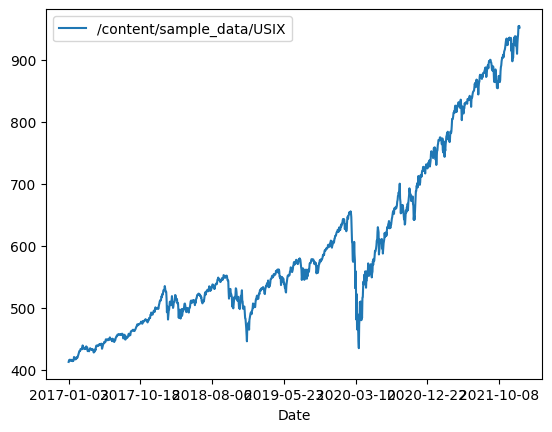

In [32]:
dfIndex.plot()

b) Augment the DataFrame with the 10-day and 30-day moving averages of the daily adjusted closing prices.

In [33]:
dfIndex['MA10'] = dfIndex['/content/sample_data/USIX'].rolling(window=10, min_periods=1).mean()
dfIndex.head(10)

,/content/sample_data/USIX,MA10
Date,,
2017-01-03,412.295,412.295000
2017-01-04,414.748,413.521500
2017-01-05,414.418,413.820333
2017-01-06,415.901,414.340500
2017-01-09,414.528,414.378000
2017-01-10,414.528,414.403000
2017-01-11,415.700,414.588286
2017-01-12,414.656,414.596750
2017-01-13,415.608,414.709111


In [34]:
dfIndex['MA30'] = dfIndex['/content/sample_data/USIX'].rolling(window=30, min_periods=1).mean()
dfIndex.head(30)

,/content/sample_data/USIX,MA10,MA30
Date,,,
2017-01-03,412.295,412.295000,412.295000
2017-01-04,414.748,413.521500,413.521500
2017-01-05,414.418,413.820333,413.820333
2017-01-06,415.901,414.340500,414.340500
2017-01-09,414.528,414.378000,414.378000
2017-01-10,414.528,414.403000,414.403000
2017-01-11,415.700,414.588286,414.588286
2017-01-12,414.656,414.596750,414.596750
2017-01-13,415.608,414.709111,414.709111


c) Visualize the DJIA adjusted closing prices and the 10-day and 30-day moving average in a chart.

<Axes: xlabel='Date'>

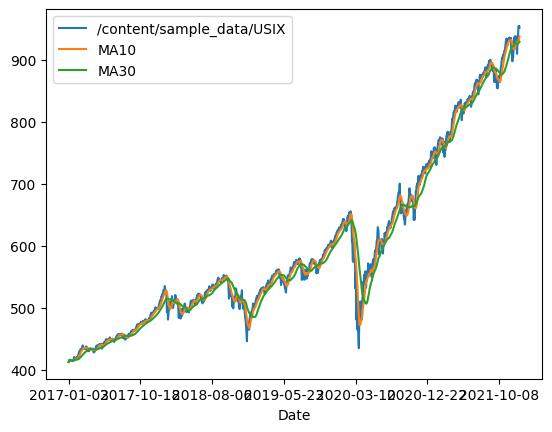

In [35]:
# plot of full data
dfIndex.plot()

<Axes: xlabel='Date'>

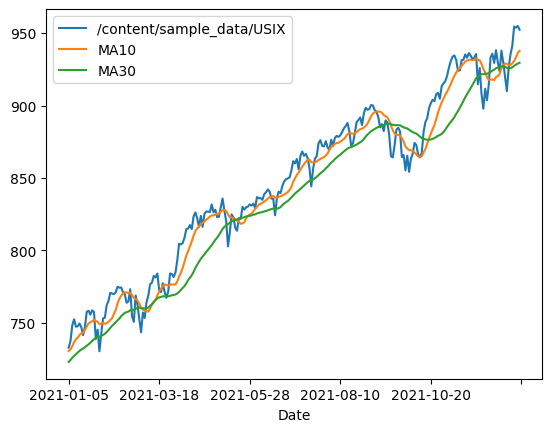

In [36]:
# plot of last year (250 business days)
dfIndex.tail(250).plot()

## **Problem 5) Distribution and Outliers—DJIA**

For the Dow Jones Industrial Average (DJIA) daily adjusted closing prices:

a) Read these data into a DataFrame and augment the data with the daily returns of adjusted closing price.

In [37]:
indexSymbol = '/content/sample_data/USIX'  # change this to name of index, e.g., 'DJIA'
priceColumn = 'AdjustedClose' # Change this to name of price column, e.g., 'Adj Close'

In [38]:
dfIndex = pd.read_csv(indexSymbol +'.csv', index_col = 'Date', usecols=['Date', priceColumn])
dfIndex.rename(columns={priceColumn:indexSymbol}, inplace=True)
dfIndex.head()

,/content/sample_data/USIX
Date,
2017-01-03,412.295
2017-01-04,414.748
2017-01-05,414.418
2017-01-06,415.901
2017-01-09,414.528


<Axes: xlabel='Date'>

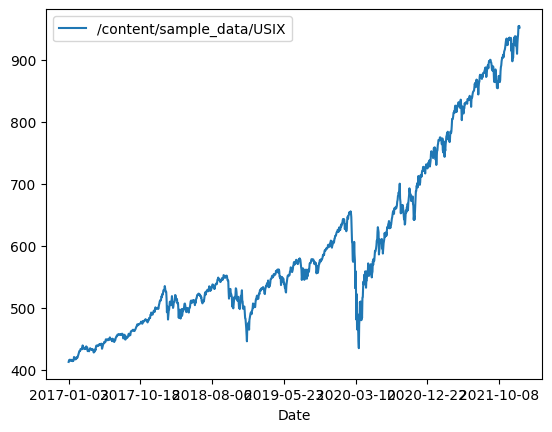

In [39]:
dfIndex.plot()

In [40]:
dfIndex[indexSymbol+'_Return'] = dfIndex[indexSymbol].pct_change()
dfIndex.head(5)

,/content/sample_data/USIX,/content/sample_data/USIX_Return
Date,,
2017-01-03,412.295,NaN
2017-01-04,414.748,0.005950
2017-01-05,414.418,-0.000796
2017-01-06,415.901,0.003579
2017-01-09,414.528,-0.003301


b) Plot a histogram of the daily returns.

<Axes: ylabel='Frequency'>

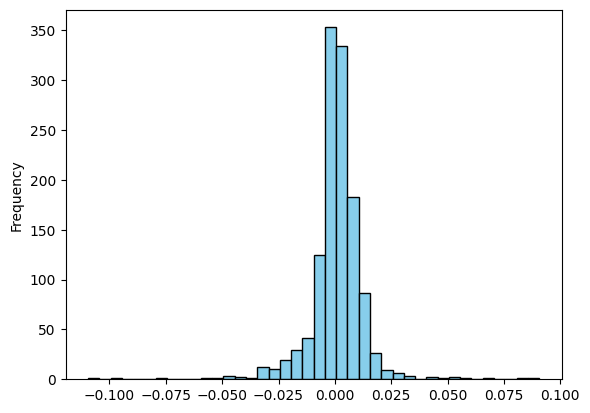

In [41]:
#bins=40

dfIndex['/content/sample_data/USIX_Return'].plot.hist(bins=40, color='skyblue', edgecolor='black')

c) Calculate the skewness and kurtosis of the DJIA daily returns.

In [42]:
from scipy.stats import skew, kurtosis

djia_returns = dfIndex['/content/sample_data/USIX_Return'].dropna()

# Calculate skewness and kurtosis
skewness = skew(djia_returns)
kurt = kurtosis(djia_returns)


In [43]:
print(skewness)
print(kurt)

-0.7860360337980291
18.16715205631576


d) Determine using a statistical test if the daily returns follow a normal distribution (with 95% confidence).

In [44]:
import scipy.stats as stats


skewness_test_p_value = stats.skewtest(dfIndex[indexSymbol+'_Return'][1:]).pvalue
kurtosis_test_p_value = stats.kurtosistest(dfIndex[indexSymbol+'_Return'][1:]).pvalue

print('Skewness test p value:', round(skewness_test_p_value, 4))
print('Kurtosis test p value:', round(kurtosis_test_p_value, 4))

Skewness test p value: 0.0
Kurtosis test p value: 0.0


e) Based on the standard deviation of the daily returns, identify those dates and returns that were smaller than -3 standard deviations or larger than +3 standard deviations.

In [45]:
indexReturns = dfIndex[indexSymbol+'_Return'][1:]
indexReturns.head(5)

Date
2017-01-04    0.005950
2017-01-05   -0.000796
2017-01-06    0.003579
2017-01-09   -0.003301
2017-01-10    0.000000
Name: /content/sample_data/USIX_Return, dtype: float64

In [46]:
# sd = indexReturns.std()
sd = indexReturns.std()
sd

0.011885790574466535

In [47]:
indexReturns.head(15)

Date
2017-01-04    0.005950
2017-01-05   -0.000796
2017-01-06    0.003579
2017-01-09   -0.003301
2017-01-10    0.000000
2017-01-11    0.002827
2017-01-12   -0.002511
2017-01-13    0.002296
2017-01-17   -0.003523
2017-01-18    0.002209
2017-01-19   -0.003703
2017-01-20    0.003673
2017-01-23   -0.002602
2017-01-24    0.006411
2017-01-25    0.008655
Name: /content/sample_data/USIX_Return, dtype: float64

## **Problem 6) Distribution and Outliers—Stock**

For a stock of interest, download its daily adjusted closing price for five years of history.

a) Read these data into a DataFrame and augment the data with the daily returns of adjusted closing price.

In [48]:
symbol = '/content/sample_data/ORNG'  # change this to name of index, e.g., 'DJIA'
priceColumn = 'AdjustedClose' # Change this to name of price column, e.g., 'Adj Close'

In [49]:
df = pd.read_csv(symbol +'.csv', index_col = 'Date', usecols=['Date', priceColumn])
df.rename(columns={priceColumn:symbol}, inplace=True)
df.head()

,/content/sample_data/ORNG
Date,
2017-01-03,54.595
2017-01-04,54.534
2017-01-05,54.812
2017-01-06,55.423
2017-01-09,55.930


<Axes: xlabel='Date'>

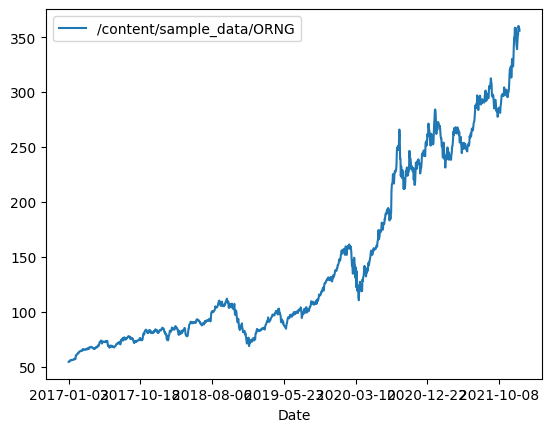

In [50]:
df.plot()

In [51]:
df[symbol+'_Return'] = df[symbol].pct_change()
df.head(5)

,/content/sample_data/ORNG,/content/sample_data/ORNG_Return
Date,,
2017-01-03,54.595,NaN
2017-01-04,54.534,-0.001117
2017-01-05,54.812,0.005098
2017-01-06,55.423,0.011147
2017-01-09,55.930,0.009148


b) Plot a histogram of the daily returns.

<Axes: ylabel='Frequency'>

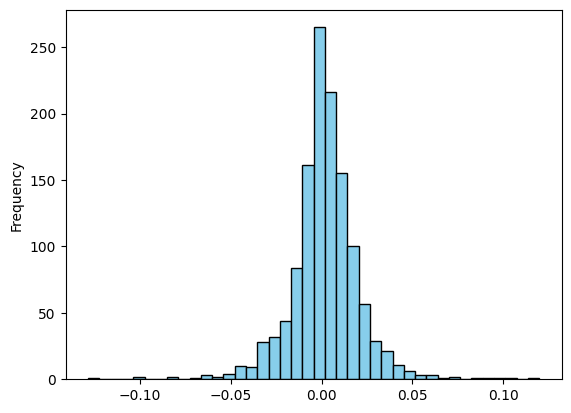

In [52]:
df['/content/sample_data/ORNG_Return'].plot.hist(bins=40, color='skyblue', edgecolor='black')

c) Calculate the skewness and kurtosis of the daily returns.

In [58]:
djia_returns = df['/content/sample_data/ORNG_Return'].dropna()

# Calculate skewness and kurtosis
skewness = skew(djia_returns)
kurt = kurtosis(djia_returns)

In [59]:
print(skewness)
print(kurt)

-0.10086668016451043
6.619254082806862


d) Determine using a statistical test if the daily returns follow a normal distribution (with 95% confidence).

In [60]:
import scipy.stats as stats
skewness_test_p_value = stats.skewtest(df[symbol+'_Return'][1:]).pvalue
kurtosis_test_p_value = stats.kurtosistest(df[symbol+'_Return'][1:]).pvalue

print('Skewness test p value:', round(skewness_test_p_value, 4))
print('Kurtosis test p value:', round(kurtosis_test_p_value, 4))

Skewness test p value: 0.1429
Kurtosis test p value: 0.0


e) Based on the standard deviation of the daily returns, identify those dates and returns that were smaller than -3 standard deviations or larger than +3 standard deviations.

In [63]:
indexReturns = df[symbol+'_Return'][1:]
indexReturns.head(5)

Date
2017-01-04   -0.001117
2017-01-05    0.005098
2017-01-06    0.011147
2017-01-09    0.009148
2017-01-10    0.001019
Name: /content/sample_data/ORNG_Return, dtype: float64

In [65]:
sd = indexReturns.std()
sd

0.019188713127923654

In [66]:
indexReturns.head(15
                  )

Date
2017-01-04   -0.001117
2017-01-05    0.005098
2017-01-06    0.011147
2017-01-09    0.009148
2017-01-10    0.001019
2017-01-11    0.005376
2017-01-12   -0.004175
2017-01-13   -0.001766
2017-01-17    0.008060
2017-01-18   -0.000089
2017-01-19   -0.001738
2017-01-20    0.001829
2017-01-23    0.000674
2017-01-24   -0.000921
2017-01-25    0.015925
Name: /content/sample_data/ORNG_Return, dtype: float64

## **Problem 7: Simple Regression—Stock and DJIA**

For a stock of interest, download its daily adjusted closing price for 5 years of history.

a) Read these data into a DataFrame and augment the data with the daily returns of adjusted closing price.


b) Read the data for the Dow Jones Industrial Average prices into a DataFrame.

In [67]:
dfIndex = pd.read_csv(indexSymbol +'.csv', index_col = 'Date', usecols=['Date', priceColumn])
dfIndex.rename(columns={priceColumn:indexSymbol}, inplace=True)
dfIndex.head(5)

,/content/sample_data/USIX
Date,
2017-01-03,412.295
2017-01-04,414.748
2017-01-05,414.418
2017-01-06,415.901
2017-01-09,414.528


In [68]:
dfStock = pd.read_csv(symbol +'.csv', index_col = 'Date', usecols=['Date', priceColumn])
dfStock.rename(columns={priceColumn:symbol}, inplace=True)
dfStock.head(5)

,/content/sample_data/ORNG
Date,
2017-01-03,54.595
2017-01-04,54.534
2017-01-05,54.812
2017-01-06,55.423
2017-01-09,55.930


In [69]:
dfBoth = dfIndex.join(dfStock)
dfBoth.head(5)

,/content/sample_data/USIX,/content/sample_data/ORNG
Date,,
2017-01-03,412.295,54.595
2017-01-04,414.748,54.534
2017-01-05,414.418,54.812
2017-01-06,415.901,55.423
2017-01-09,414.528,55.930


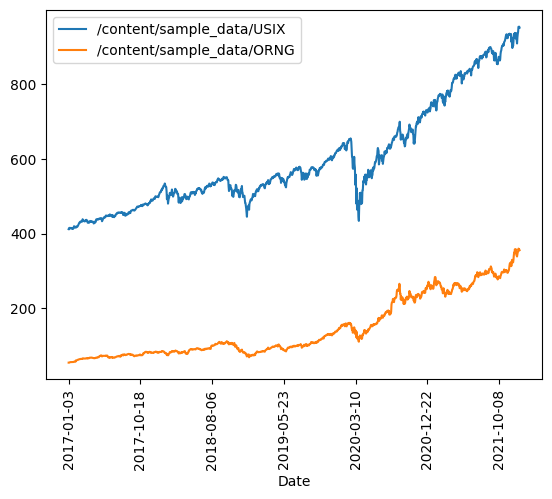

In [78]:
import matplotlib.pyplot as plt



dfBoth.plot()
plt.xticks(rotation = 90)
plt.show()





c) For both your stock as well as the DJIA, augment the data with the daily returns of adjusted closing price.



In [87]:
dfBoth[indexSymbol+'_Return'] = dfIndex['/content/sample_data/USIX'].pct_change()
dfBoth[symbol+'_Return'] = df['/content/sample_data/ORNG'].pct_change()
dfBoth.head(5)



,/content/sample_data/USIX,/content/sample_data/ORNG,/content/sample_data/USIX_Return,/content/sample_data/ORNG_Return
Date,,,,
2017-01-03,412.295,54.595,NaN,NaN
2017-01-04,414.748,54.534,0.005950,-0.001117
2017-01-05,414.418,54.812,-0.000796,0.005098
2017-01-06,415.901,55.423,0.003579,0.011147
2017-01-09,414.528,55.930,-0.003301,0.009148


.pct_change(): This method calculates the percentage change between the current and prior element. In the context of stock data, it calculates the returns from one period to the next. This is useful for analyzing stock performance over time.

d) Plot a scattergram of DJA daily returns (x axis) vs. the stock’s daily returns (y axis).

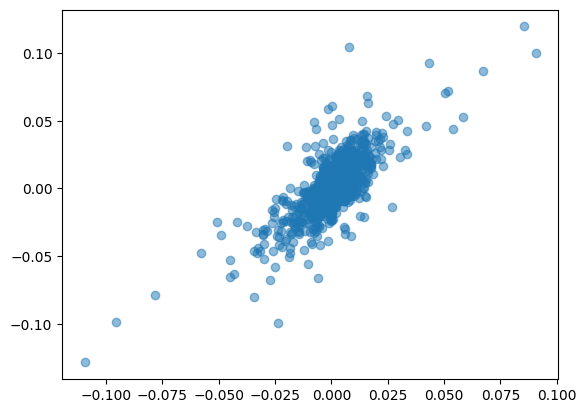

In [88]:

plt.scatter(dfBoth['/content/sample_data/USIX_Return'], dfBoth['/content/sample_data/ORNG_Return'], alpha=0.5)



e) Perform a linear regression between the DJIA returns (independent variable) and the stock’s returns (dependent variable).

In [89]:
x = dfBoth[indexSymbol+'_Return'][1:]
y = dfBoth[symbol+'_Return'][1:]

In [94]:
from scipy.stats import linregress

beta, alpha, rvalue, pvalue, stderr = linregress(x, y)




In [95]:
print('Beta:     ', round(beta,2))
print('Alpha:    ', round(alpha,2))
print('R-squared:', round(rvalue**2 * 100), '%')
print('pvalue:   ', round(pvalue, 4))
print('stderr:   ', round(stderr, 4))

Beta:      1.23
Alpha:     0.0
R-squared: 58 %
pvalue:    0.0
stderr:    0.0295
